In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../data/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# EDA

### 1. Viewing the data

In [3]:
df.shape

(1338, 7)

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### 2. Summary Statistics

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### 3. Visualization to analyse the quality of data 

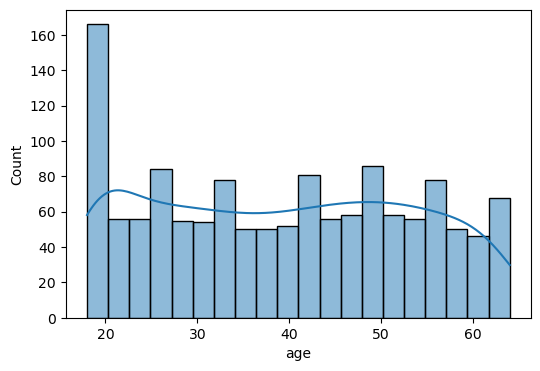

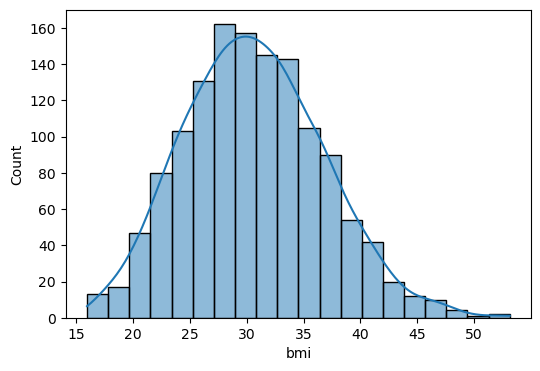

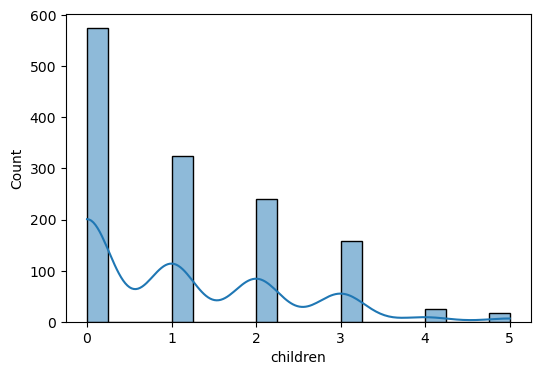

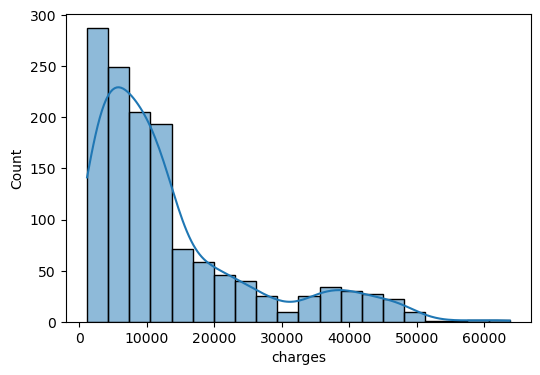

In [11]:
# to check the kernal density we need to check how numeric values are distributed and form the kernal density curve shape 
numeric_cols = ['age', 'bmi', 'children', 'charges']

for col in numeric_cols:
    plt.figure(figsize = (6, 4))
    sns.histplot(df[col], kde = True, bins= 20)

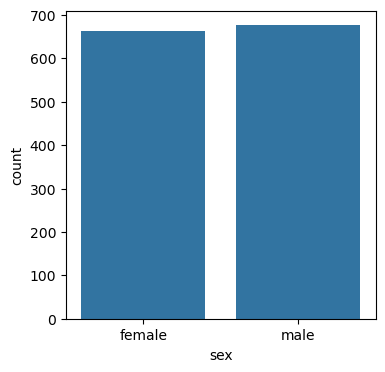

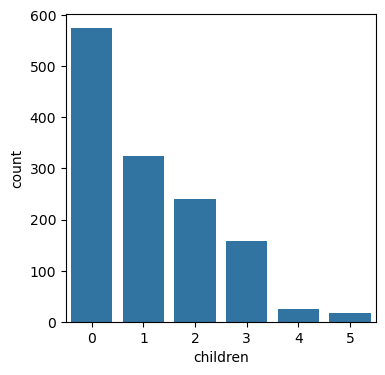

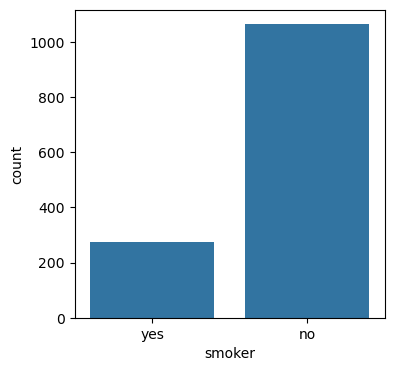

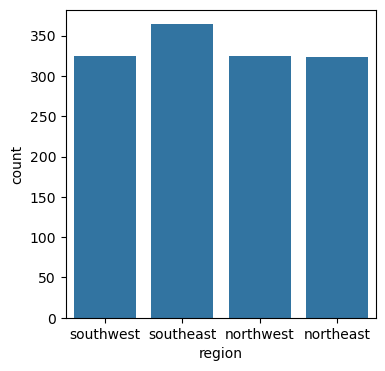

In [12]:
# to the distribution of the categorical dta we need to count each values of each type to sum 
categorical_cols = ['sex', 'children', 'smoker', 'region']

for cols in categorical_cols:
    plt.figure(figsize= (4,4))
    sns.countplot(x = df[cols])

### A box plot summarizes a distribution using five-number summary:

1. Minimum (excluding outliers)
2. Q1 (25th percentile)
3. Median (50th percentile)
4. Q3 (75th percentile)
5. Outliers are just extra information, not the main goal.

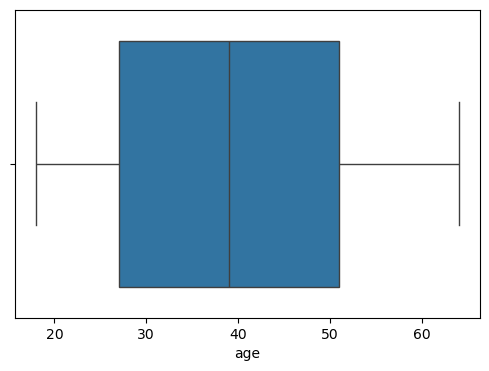

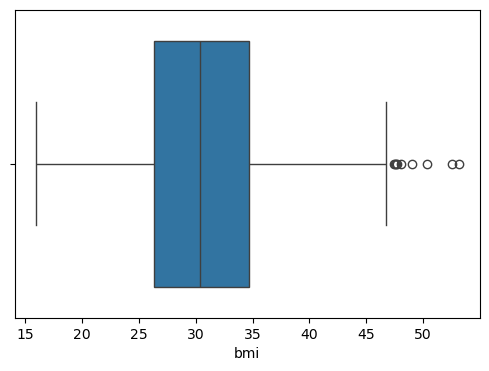

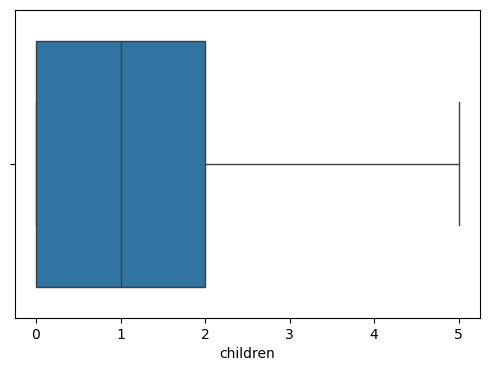

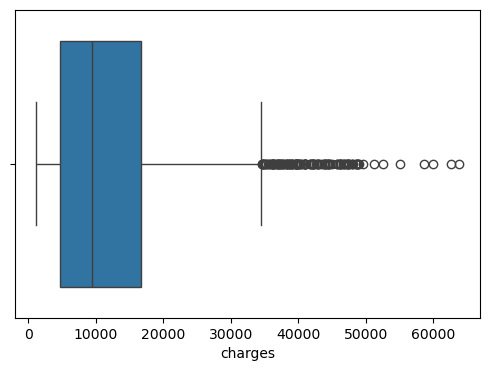

In [13]:
for cols in numeric_cols:
    plt.figure(figsize= (6,4))
    sns.boxplot(x= df[cols])

### since we want to predict the charges it is our output (target variable) and rest others are input variables

1. we need to check how does our target variable changes with respect to other input variables
2. “Correlation measures the strength and direction of the linear relationship between two numerical variables and is often used to assess how features relate to the target variable.”
3. How strongly two variables move together linearly

<Axes: >

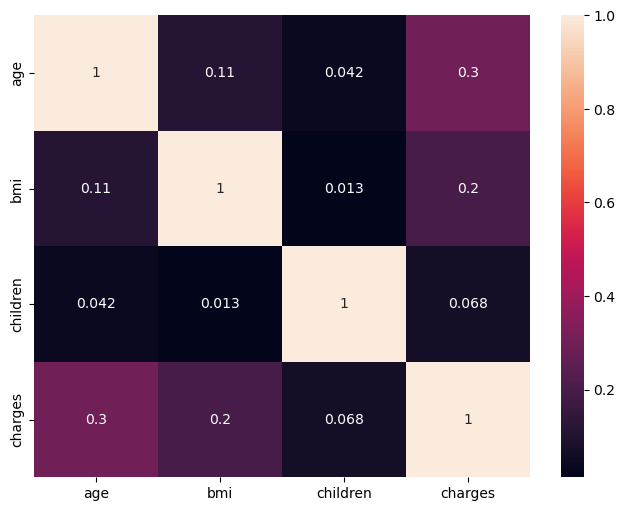

In [14]:
plt.figure(figsize= (8,6))
sns.heatmap(df.corr(numeric_only= True), annot= True) # corr shows the correlation of all numeric data in the dataset by default ==> numeric_only = True

# Data cleaning

In [15]:
df_cleaned = df.copy()

In [16]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
df_cleaned.shape

(1338, 7)

In [18]:
df_cleaned.drop_duplicates(inplace= True)

In [19]:
df_cleaned.shape

(1337, 7)

In [20]:
df_cleaned.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [21]:
df_cleaned.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

# Data Preprocessing

#### for building model we need to work on numeric data not on objects so we need to encode objects into numeric

In [22]:
# to reduce the problem like =>  Male, M, male, etc ===>> most important for categorical data
df_cleaned['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [23]:
df_cleaned['sex'] = df_cleaned['sex'].map({'male': 0, 'female': 1})

In [24]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [25]:
df_cleaned['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [26]:
df_cleaned['smoker'] = df_cleaned['smoker'].map({'yes': 1, 'no': 0})

In [27]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [28]:
df_cleaned['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [29]:
# mapping to 0, 1, 2, 3 will create anomalies as there are more than 2 values are there so will use one hot encoding

# create dummies of any columns = ? 
# “One dummy variable is dropped to avoid multicollinearity because the remaining dummies already fully represent all categories.” drop_first = true 
# northeast is dropped since all others can answer ==> when others are false then it is definitely northeast
df_cleaned = pd.get_dummies(df_cleaned, columns= ['region'], drop_first= True)

In [30]:
df_cleaned.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [31]:
df_cleaned.dtypes

age                   int64
sex                   int64
bmi                 float64
children              int64
smoker                int64
charges             float64
region_northwest       bool
region_southeast       bool
region_southwest       bool
dtype: object

In [32]:
df_cleaned.rename(columns= {'sex': 'is_female', 'smoker': 'is_smoker'}, inplace= True)

In [33]:
df_cleaned = df_cleaned.astype(int)
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0
1334,18,1,31,0,0,2205,0,0,0
1335,18,1,36,0,0,1629,0,1,0
1336,21,1,25,0,0,2007,0,0,1


# Feature Engineering

In [34]:
# if i see bmi data then i can understand that an individual can be categories based on it like underweight, overweight and so on
# bmi = 18.5 => underweight, 24.9 = overweight, 29.9 => obese, float('inf') => upto infinity

# pd.cut() is a Pandas function used to convert continuous numerical data into discrete intervals (bins).
df_cleaned['bmi_category'] = pd.cut(
    df_cleaned['bmi'],
    bins= [0, 18.5, 24.9, 29.9, float('inf')],
    labels= ['Underweight', 'Normal', 'Overweight', 'Obese']
)

df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,1,Overweight
1,18,0,33,1,0,1725,0,1,0,Obese
2,28,0,33,3,0,4449,0,1,0,Obese
3,33,0,22,0,0,21984,1,0,0,Normal
4,32,0,28,0,0,3866,1,0,0,Overweight
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,Obese
1334,18,1,31,0,0,2205,0,0,0,Obese
1335,18,1,36,0,0,1629,0,1,0,Obese
1336,21,1,25,0,0,2007,0,0,1,Overweight


In [35]:
df_cleaned['bmi_category'].value_counts()

bmi_category
Obese          706
Overweight     386
Normal         221
Underweight     24
Name: count, dtype: int64

In [36]:
df_cleaned = pd.get_dummies(df_cleaned, columns= ['bmi_category'], drop_first= True)
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27,0,1,16884,0,0,1,False,True,False
1,18,0,33,1,0,1725,0,1,0,False,False,True
2,28,0,33,3,0,4449,0,1,0,False,False,True
3,33,0,22,0,0,21984,1,0,0,True,False,False
4,32,0,28,0,0,3866,1,0,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,False,False,True
1334,18,1,31,0,0,2205,0,0,0,False,False,True
1335,18,1,36,0,0,1629,0,1,0,False,False,True
1336,21,1,25,0,0,2007,0,0,1,False,True,False


In [37]:
df_cleaned['age_category'] = pd.cut(
    df_cleaned['age'],
    bins= [0, 18, 34, float('inf')], 
    labels= ['Children', 'Teen', 'Adult']
)

df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese,age_category
0,19,1,27,0,1,16884,0,0,1,False,True,False,Teen
1,18,0,33,1,0,1725,0,1,0,False,False,True,Children
2,28,0,33,3,0,4449,0,1,0,False,False,True,Teen
3,33,0,22,0,0,21984,1,0,0,True,False,False,Teen
4,32,0,28,0,0,3866,1,0,0,False,True,False,Teen
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,False,False,True,Adult
1334,18,1,31,0,0,2205,0,0,0,False,False,True,Children
1335,18,1,36,0,0,1629,0,1,0,False,False,True,Children
1336,21,1,25,0,0,2007,0,0,1,False,True,False,Teen


In [38]:
df_cleaned['age_category'].value_counts()

age_category
Adult       789
Teen        479
Children     69
Name: count, dtype: int64

In [39]:
df_cleaned= pd.get_dummies(df_cleaned, columns= ['age_category'], drop_first= True)

In [40]:
df_cleaned = df_cleaned.astype(int)

In [41]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese,age_category_Teen,age_category_Adult
0,19,1,27,0,1,16884,0,0,1,0,1,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,1,0,0
2,28,0,33,3,0,4449,0,1,0,0,0,1,1,0
3,33,0,22,0,0,21984,1,0,0,1,0,0,1,0
4,32,0,28,0,0,3866,1,0,0,0,1,0,1,0


## Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler

cols= ['age', 'bmi', 'children'] # cols whom i want to scale into standardisation (-3 to 3) ==> do not touch target variable
scaler = StandardScaler() # create an object of class StandardScaler

df_cleaned[cols] = scaler.fit_transform(df_cleaned[cols]) 

In [43]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese,age_category_Teen,age_category_Adult
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,0,0,1,0,0
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,0,0,1,1,0
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,1,0,0,1,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.767704,0,-0.027743,1.580143,0,10600,1,0,0,0,0,1,0,1
1334,-1.511647,1,0.135659,-0.909234,0,2205,0,0,0,0,0,1,0,0
1335,-1.511647,1,0.952670,-0.909234,0,1629,0,1,0,0,0,1,0,0
1336,-1.297958,1,-0.844753,-0.909234,0,2007,0,0,1,0,1,0,1,0


# Feature Extraction / Selection

In [44]:
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese',
       'age_category_Teen', 'age_category_Adult'],
      dtype='object')

In [45]:
# to check the correlation between target and other input variables we will use pearson correlation

from scipy.stats import pearsonr # r = pearson correlation coefficient (-1 to 1)
# ±0.90 to ±1.00	Very strong
# ±0.70 to ±0.90	Strong
# ±0.50 to ±0.70	Moderate
# ±0.20 to ±0.50	Weak
# 0.10 to ±0.20     Very weak / none

# pearsonr() computes:
# Correlation coefficient (r)
# p-value (statistical significance) ==> “The p-value tells us whether the relationship we see in the data is real or just random coincidence.”

# selected features are all inputs against the target output
selected_features = [
       'age', 'is_female', 'bmi', 'children', 'is_smoker',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese',
       'age_category_Teen', 'age_category_Adult'
]

correlations = {
    feature: pearsonr(df_cleaned[feature], df_cleaned['charges'])[0]
    # returns (r_value, p_value)
    # [0] → r_value (correlation coefficient)

    for feature in selected_features
}

correlations_df = pd.DataFrame(list(correlations.items()), columns= ['Feature', 'Pearson Correlation'])
correlations_df.sort_values(by= 'Pearson Correlation', ascending= False)

,Feature,Pearson Correlation
4,is_smoker,0.787234
0,age,0.298309
12,age_category_Adult,0.247225
10,bmi_category_Obese,0.200348
2,bmi,0.196236
6,region_southeast,0.073577
3,children,0.067390
5,region_northwest,-0.038695
7,region_southwest,-0.043637
1,is_female,-0.058046


In [46]:
# to compare one categorical with another categorical variable we use chi square test 
cat_features = [
       'is_female', 'is_smoker',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese',
       'age_category_Teen', 'age_category_Adult'
]

In [47]:
# which categorical features have a statistically significant relationship with insurance charges, using the Chi-Square Test of Independence.

from scipy.stats import chi2_contingency

alpha = 0.05
# p_value < 0.05 → significant → keep feature
# p_value ≥ 0.05 → not significant → drop feature

# Convert continuous target into categorical bins (pd.qcut() — Quantile-Based Binning) ==> chi square works only on categorical data so we need to convert our target variable
df_cleaned['charges_bin'] = pd.qcut(df_cleaned['charges'], q = 4, labels = False)
chi2_results = {}

# hypothesis testing: 
    # Null Hypothesis (H₀): No relationship between the variables (they are independent)
    # Alternative Hypothesis (H₁): There is a relationship between the variables

for cols in cat_features: 
    # Create contingency/frequency table ==>> input for chi square table 
    contigency = pd.crosstab(df_cleaned[cols], df_cleaned['charges_bin'])
    
    # Chi-Square compares:
        # Observed frequencies → what actually happened
        # Expected frequencies → what should happen if variables were independent

    # chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
        # chi2_stat → how different observed data is from expected
              # chi² value	              Meaning
                # Large	         Observed ≠ Expected → strong association
                # Small	         Observed ≈ Expected → weak or no association
        # p_val → significance of the association
        # _ → degrees of freedom (ignored)
        # _ → expected frequencies (ignored)
    chi2_stat, p_val, _, _ = chi2_contingency(contigency)

    desision = 'Reject Null (keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'

    # store it in the dictionary
    chi2_results[cols]= {
        'chi2_statistics': chi2_stat,
        'p_value': p_val, 
        'Decision': desision
    }

# convert the hi2_results dictionary into dataframe
chi2_df = pd.DataFrame(chi2_results).T # transpose so that each feature is a new row
chi2_df = chi2_df.sort_values(by = 'p_value')
chi2_df

,chi2_statistics,p_value,Decision
is_smoker,848.219178,0.0,Reject Null (keep Feature)
age_category_Adult,675.147466,0.0,Reject Null (keep Feature)
age_category_Teen,506.860108,0.0,Reject Null (keep Feature)
region_southeast,15.998167,0.001135,Reject Null (keep Feature)
is_female,10.258784,0.01649,Reject Null (keep Feature)
bmi_category_Obese,8.515711,0.036473,Reject Null (keep Feature)
region_southwest,5.091893,0.165191,Accept Null (Drop Feature)
bmi_category_Overweight,4.25149,0.235557,Accept Null (Drop Feature)
bmi_category_Normal,3.708088,0.29476,Accept Null (Drop Feature)
region_northwest,1.13424,0.768815,Accept Null (Drop Feature)


“I used the Chi-Square test to evaluate the association between categorical features and insurance charges. Since Chi-Square requires categorical data, I first discretized the continuous target variable into quartiles using qcut. For each categorical feature, I built a contingency table and applied the Chi-Square test. Features with p-values below 0.05 were considered statistically significant and retained, while others were dropped.”

In [48]:
# after this create a final dataframe in which keep only those features which we need to build model and drop them as decisions in chi2 test 
final_df = df_cleaned[['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges', 'region_southeast',
       'bmi_category_Obese','age_category_Teen', 'age_category_Adult']]

In [49]:
final_df # model ready dataset

,age,is_female,bmi,children,is_smoker,charges,region_southeast,bmi_category_Obese,age_category_Teen,age_category_Adult
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,1,1,0,0
2,-0.799350,0,0.462463,1.580143,0,4449,1,1,1,0
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,0,1,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1333,0.767704,0,-0.027743,1.580143,0,10600,0,1,0,1
1334,-1.511647,1,0.135659,-0.909234,0,2205,0,1,0,0
1335,-1.511647,1,0.952670,-0.909234,0,1629,1,1,0,0
1336,-1.297958,1,-0.844753,-0.909234,0,2007,0,0,1,0
